# NBA Archetypes

## Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, silhouette_score, f1_score
from sklearn.manifold import TSNE
from xgboost import XGBClassifier

## Load Data

In [2]:
# Load data function
def load_data(file_name, local_path, server_path, encoding='utf-8', sep=','):
    try:
        data = pd.read_csv(local_path + file_name, encoding=encoding, sep=';')
        print(f"'{file_name}' file successfully read from the local path.")

    except (FileNotFoundError, UnicodeDecodeError):
        try:
            data = pd.read_csv(server_path + file_name, encoding=encoding, sep=';')
            print(f"'{file_name}' file successfully read from the server path.")

        except FileNotFoundError:
            print(f"'{file_name}' file not found. Please check the file paths.")
            data = None

        except UnicodeDecodeError:
            print(f"Encoding error encountered while reading '{file_name}' from the server path.")
            data = None
            
    return data

file_name = '2023-2024 NBA Player Stats - Regular.csv'
local_path = '/Users/benjaminstephen/Documents/TripleTen/Code_Pudding/NBA-Archetypes/datasets/'
server_path = '/datasets/'

df = load_data(file_name, local_path, server_path, encoding='ISO-8859-1', sep=';')

'2023-2024 NBA Player Stats - Regular.csv' file successfully read from the local path.


In [3]:
display(df)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,...,0.333,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3
731,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,...,0.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7
732,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,...,0.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6
733,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,...,0.605,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8


## Data Preprocessing

In [4]:
# Analyze function
def analyze(data):
    # Display the DataFrame
    display(data)

    # Print DataFrame Info
    print("DATAFRAME INFO:")
    data.info()
    print()

    # Calculate Percentage of Null Values
    print("PERCENTAGE OF NULL VALUES:")
    print((data.isnull().sum()/len(data)) * 100)
    print()

    # Calculate Number of Duplicated Rows
    print("NUMBER OF DUPLICATED ROWS:", data.duplicated().sum())

In [5]:
analyze(df)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,...,0.333,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3
731,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,...,0.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7
732,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,...,0.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6
733,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,...,0.605,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8


DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      735 non-null    int64  
 1   Player  735 non-null    object 
 2   Pos     735 non-null    object 
 3   Age     735 non-null    int64  
 4   Tm      735 non-null    object 
 5   G       735 non-null    int64  
 6   GS      735 non-null    int64  
 7   MP      735 non-null    float64
 8   FG      735 non-null    float64
 9   FGA     735 non-null    float64
 10  FG%     735 non-null    float64
 11  3P      735 non-null    float64
 12  3PA     735 non-null    float64
 13  3P%     735 non-null    float64
 14  2P      735 non-null    float64
 15  2PA     735 non-null    float64
 16  2P%     735 non-null    float64
 17  eFG%    735 non-null    float64
 18  FT      735 non-null    float64
 19  FTA     735 non-null    float64
 20  FT%     735 non-null    float64
 21  ORB     735 non-null   

In [6]:
df = df.drop(columns=['Rk', 'Pos', 'Tm', 'TRB', 'Age'])

In [7]:
# Group by 'Player' and aggregate stats
aggregated_df = df.groupby('Player').agg({
    #'Age': 'first',  # Use the first occurrence of age, assuming age doesn’t change within a season
    'G': 'sum',  # Total games played
    'GS': 'sum',  # Total games started
    'MP': 'sum',  # Total minutes played
    'FG': 'sum',  # Total field goals made
    'FGA': 'sum',  # Total field goals attempted
    'FG%': 'mean',  # Average field goal percentage
    '3P': 'sum',  # Total three-pointers made
    '3PA': 'sum',  # Total three-point attempts
    '3P%': 'mean',  # Average three-point percentage
    '2P': 'sum',  # Total two-pointers made
    '2PA': 'sum',  # Total two-point attempts
    '2P%': 'mean',  # Average two-point percentage
    'eFG%': 'mean',  # Average effective field goal percentage
    'FT': 'sum',  # Total free throws made
    'FTA': 'sum',  # Total free throw attempts
    'FT%': 'mean',  # Average free throw percentage
    'ORB': 'sum',  # Total offensive rebounds
    'DRB': 'sum',  # Total defensive rebounds
    'AST': 'sum',  # Total assists
    'STL': 'sum',  # Total steals
    'BLK': 'sum',  # Total blocks
    'TOV': 'sum',  # Total turnovers
    'PF': 'sum',  # Total personal fouls
    'PTS': 'sum'   # Total points scored
}).reset_index()

# Verify the aggregated data
print(aggregated_df.head())

          Player   G  GS    MP   FG  FGA    FG%   3P  3PA    3P%  ...  FTA  \
0     A.J. Green  56   0  11.0  1.5  3.5  0.423  1.2  3.0  0.408  ...  0.3   
1    A.J. Lawson  42   0   7.4  1.3  2.9  0.446  0.3  1.2  0.260  ...  0.5   
2     AJ Griffin  20   0   8.6  0.9  3.1  0.290  0.5  2.0  0.256  ...  0.1   
3   Aaron Gordon  73  73  31.5  5.5  9.8  0.556  0.5  1.9  0.290  ...  3.7   
4  Aaron Holiday  78   1  16.3  2.4  5.3  0.446  1.1  2.8  0.387  ...  0.8   

     FT%  ORB  DRB  AST  STL  BLK  TOV   PF   PTS  
0  0.895  0.2  1.0  0.5  0.2  0.1  0.2  0.9   4.5  
1  0.652  0.3  0.9  0.5  0.2  0.1  0.3  0.5   3.2  
2  1.000  0.1  0.8  0.3  0.1  0.1  0.4  0.3   2.4  
3  0.658  2.4  4.1  3.5  0.8  0.6  1.4  1.9  13.9  
4  0.921  0.3  1.3  1.8  0.5  0.1  0.7  1.6   6.6  

[5 rows x 25 columns]


In [8]:
# Define the mapping of current column names to full names
column_mapping = {
    'Rk': 'Rank',
    'Player': 'Player Name',
    'Pos': 'Position',
    'Age': 'Age',
    'Tm': 'Team',
    'G': 'Games Played',
    'GS': 'Games Started',
    'MP': 'Minutes Per Game',
    'FG': 'Field Goals Made',
    'FGA': 'Field Goals Attempted',
    'FG%': 'Field Goal Percentage',
    '3P': 'Three-Point Field Goals Made',
    '3PA': 'Three-Point Field Goals Attempted',
    '3P%': 'Three-Point Field Goal Percentage',
    '2P': 'Two-Point Field Goals Made',
    '2PA': 'Two-Point Field Goals Attempted',
    '2P%': 'Two-Point Field Goal Percentage',
    'eFG%': 'Effective Field Goal Percentage',
    'FT': 'Free Throws Made',
    'FTA': 'Free Throws Attempted',
    'FT%': 'Free Throw Percentage',
    'ORB': 'Offensive Rebounds',
    'DRB': 'Defensive Rebounds',
    'TRB': 'Total Rebounds',
    'AST': 'Assists',
    'STL': 'Steals',
    'BLK': 'Blocks',
    'TOV': 'Turnovers',
    'PF': 'Personal Fouls',
    'PTS': 'Points'
}

# Rename the columns using the mapping
df.rename(columns=column_mapping, inplace=True)

# Verify the changes
print(df.head())


        Player Name  Games Played  Games Started  Minutes Per Game  \
0  Precious Achiuwa            74             18              21.9   
1  Precious Achiuwa            25              0              17.5   
2  Precious Achiuwa            49             18              24.2   
3       Bam Adebayo            71             71              34.0   
4      Ochai Agbaji            78             28              21.0   

   Field Goals Made  Field Goals Attempted  Field Goal Percentage  \
0               3.2                    6.3                  0.501   
1               3.1                    6.8                  0.459   
2               3.2                    6.1                  0.525   
3               7.5                   14.3                  0.521   
4               2.3                    5.6                  0.411   

   Three-Point Field Goals Made  Three-Point Field Goals Attempted  \
0                           0.4                                1.3   
1                       

In [9]:
df_copy = df.copy
analyze(df)

,Player Name,Games Played,Games Started,Minutes Per Game,Field Goals Made,Field Goals Attempted,Field Goal Percentage,Three-Point Field Goals Made,Three-Point Field Goals Attempted,Three-Point Field Goal Percentage,...,Free Throws Attempted,Free Throw Percentage,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points
0,Precious Achiuwa,74,18,21.9,3.2,6.3,0.501,0.4,1.3,0.268,...,1.5,0.616,2.6,4.0,1.3,0.6,0.9,1.1,1.9,7.6
1,Precious Achiuwa,25,0,17.5,3.1,6.8,0.459,0.5,1.9,0.277,...,1.7,0.571,2.0,3.4,1.8,0.6,0.5,1.2,1.6,7.7
2,Precious Achiuwa,49,18,24.2,3.2,6.1,0.525,0.3,1.0,0.260,...,1.4,0.643,2.9,4.3,1.1,0.6,1.1,1.1,2.1,7.6
3,Bam Adebayo,71,71,34.0,7.5,14.3,0.521,0.2,0.6,0.357,...,5.5,0.755,2.2,8.1,3.9,1.1,0.9,2.3,2.2,19.3
4,Ochai Agbaji,78,28,21.0,2.3,5.6,0.411,0.8,2.7,0.294,...,0.7,0.661,0.9,1.8,1.1,0.6,0.6,0.8,1.5,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,Thaddeus Young,10,0,8.9,1.1,2.1,0.524,0.0,0.1,0.000,...,0.3,0.333,1.7,1.1,0.7,0.5,0.2,0.4,1.1,2.3
731,Trae Young,54,54,36.0,8.0,18.7,0.430,3.2,8.7,0.373,...,7.5,0.855,0.4,2.3,10.8,1.3,0.2,4.4,2.0,25.7
732,Omer Yurtseven,48,12,11.4,2.1,3.8,0.538,0.1,0.5,0.208,...,0.6,0.679,1.5,2.8,0.6,0.2,0.4,0.8,1.1,4.6
733,Cody Zeller,43,0,7.4,0.6,1.4,0.419,0.0,0.1,0.333,...,0.9,0.605,1.1,1.5,0.9,0.2,0.1,0.4,1.0,1.8


DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Player Name                        735 non-null    object 
 1   Games Played                       735 non-null    int64  
 2   Games Started                      735 non-null    int64  
 3   Minutes Per Game                   735 non-null    float64
 4   Field Goals Made                   735 non-null    float64
 5   Field Goals Attempted              735 non-null    float64
 6   Field Goal Percentage              735 non-null    float64
 7   Three-Point Field Goals Made       735 non-null    float64
 8   Three-Point Field Goals Attempted  735 non-null    float64
 9   Three-Point Field Goal Percentage  735 non-null    float64
 10  Two-Point Field Goals Made         735 non-null    float64
 11  Two-Point Field Goals Attempted    735 non

### Code

In [10]:
# Drop columns not useful for clustering (e.g., Rank, Player Name, Team, Position)
df = df.drop(columns='Player Name')

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Inspect the first few rows to make sure it's scaled correctly
print(df.head())

   Games Played  Games Started  Minutes Per Game  Field Goals Made  \
0            74             18              21.9               3.2   
1            25              0              17.5               3.1   
2            49             18              24.2               3.2   
3            71             71              34.0               7.5   
4            78             28              21.0               2.3   

   Field Goals Attempted  Field Goal Percentage  Three-Point Field Goals Made  \
0                    6.3                  0.501                           0.4   
1                    6.8                  0.459                           0.5   
2                    6.1                  0.525                           0.3   
3                   14.3                  0.521                           0.2   
4                    5.6                  0.411                           0.8   

   Three-Point Field Goals Attempted  Three-Point Field Goal Percentage  \
0                

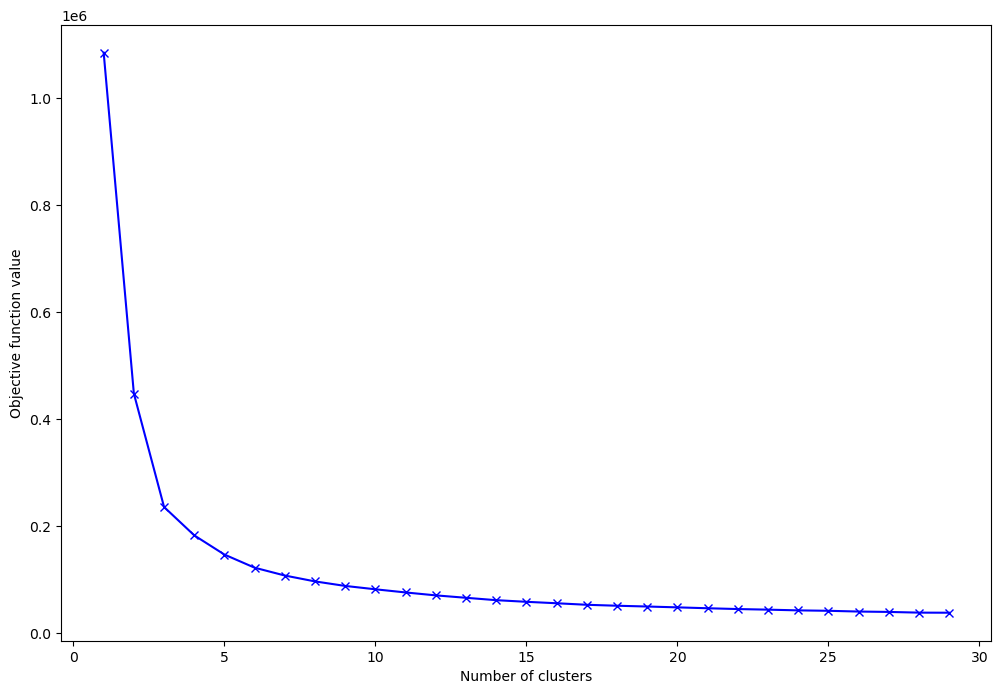

In [11]:
distortion = []
K = range(1, 30)
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(df)
    distortion.append(model.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(K, distortion, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Objective function value')
plt.show()

### K Means Clustering to find archetypes

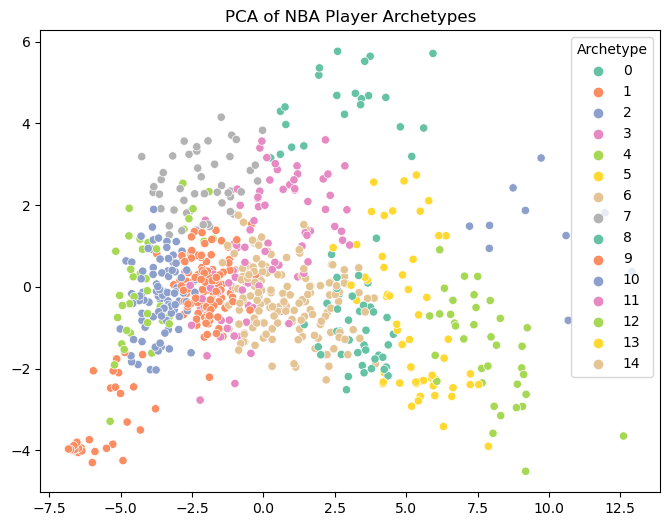

Silhouette Score: 0.12609103273784772


In [12]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=15, random_state=12345)
df['Archetype'] = kmeans.fit_predict(scaled_features)

#print('Typical user segments for 4 clusters:')
#print(model.cluster_centers_.round())

# Visualize the clusters using PCA (dimensionality reduction)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Archetype'], palette='Set2')
plt.title('PCA of NBA Player Archetypes')
plt.show()

# Evaluate clustering using silhouette score
sil_score = silhouette_score(scaled_features, df['Archetype'])
print(f'Silhouette Score: {sil_score}')

In [13]:
# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Reverse scaling the centroids to the original scale
centroids_df = scaler.inverse_transform(centroids)

# Create a DataFrame for easier interpretation
centroids_df = pd.DataFrame(centroids_df, columns=df.columns[:-1])
print(centroids_df)

    Games Played  Games Started  Minutes Per Game  Field Goals Made  \
0      44.100000   2.327500e+01         28.710000          5.060000   
1       4.500000   0.000000e+00          4.543750          0.162500   
2      18.087912   4.175824e-01          7.097802          0.849451   
3      17.488889   4.066667e+00         17.846667          1.986667   
4      61.472222   6.102778e+01         34.427778          8.563889   
5      70.250000   6.687500e+01         29.808333          5.516667   
6      58.060000   1.273000e+01         19.640000          2.664000   
7      29.270833   3.312500e+00         10.256250          1.475000   
8      53.086957   4.117391e+01         25.360870          4.347826   
9      36.849558   2.805310e+00         12.819469          1.608850   
10     69.900000   6.990000e+01         33.630000          9.370000   
11     49.255814   1.260465e+01         20.483721          3.479070   
12      9.054054  -3.552714e-15          6.848649          0.932432   
13    

## Data Splitting

In [14]:
# Extract the feature variables
features = df.drop(columns=['Archetype'], axis=1)

# Extract the target variable 'Churned'
target = df['Archetype']

# Split data: 60% for training, 20% for validation, and 20% for testing
features_train, features_temp, target_train, target_temp = train_test_split(features, target, test_size=0.4, random_state=12345)

# Further split the remaining 40% into validation (20%) and test (20%) sets
features_valid, features_test, target_valid, target_test = train_test_split(features_temp, target_temp, test_size=0.5, random_state=12345)

# Print the size of each dataset
print('Training Features Size:', features_train.shape)
print()
print('Validation Features Size:', features_valid.shape)
print()
print('Test Features Size:', features_test.shape)

Training Features Size: (441, 24)

Validation Features Size: (147, 24)

Test Features Size: (147, 24)


In [15]:
# Model evaluation function
def model_eval(model, features_train, features_valid, target_train, target_valid):
    
    # Train the model on the training data
    model.fit(features_train, target_train)

    # Generate predictions on the validation set
    predictions = model.predict(features_valid)
    probabilities_test = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_test[:, 1]

    # Calculate the AUC-ROC, Accuracy and F1 scores of the predictions
    accuracy = accuracy_score(target_valid, predictions)
    f1 = f1_score(target_valid, predictions, average='weighted')

    # Print out the AUC-ROC, Accuracy and F1 scores
    print("Accuracy:", accuracy)
    print("F1:", f1)
    print(classification_report(target_valid, predictions))

    return accuracy, f1

In [16]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=12345)

# Set up RandomizedSearchCV for tuning the Random Forest model
rf_random_search = RandomizedSearchCV(
    rf_model, 
    param_distributions={'n_estimators': [10, 50, 100, 200], 
                         'max_features': ['sqrt', 'log2'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_split': [2, 5, 10], 
                         'min_samples_leaf': [1, 2, 4]}, 
    n_iter=10,     
    cv=5,                        
    scoring='accuracy',
    n_jobs=-1,                      
    random_state=12345
)

# Fit the RandomizedSearchCV object to the training data
rf_random_search.fit(features_train, target_train)

print("BEST RANDOM FOREST HYPERPARAMETERS:", rf_random_search.best_params_)
print()

# Get the best Random Forest model from the search
tuned_rf_model = rf_random_search.best_estimator_

print("RANDOM FOREST STATS:")
print("--------------------")

# Evaluate the tuned Random Forest model
rf_accuracy, rf_f1 = model_eval(tuned_rf_model, features_train, features_valid, target_train, target_valid)

BEST RANDOM FOREST HYPERPARAMETERS: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}

RANDOM FOREST STATS:
--------------------
Accuracy: 0.8299319727891157
F1: 0.8252575407247802
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.88      0.88      0.88         8
           2       0.73      0.89      0.80        18
           3       0.88      0.70      0.78        10
           4       0.67      0.80      0.73         5
           5       1.00      0.67      0.80         3
           6       0.79      0.94      0.86        16
           7       1.00      0.44      0.62         9
           8       1.00      1.00      1.00         2
           9       0.84      0.78      0.81        27
          10       1.00      1.00      1.00         2
          11       0.82      0.82      0.82        11
          12       0.89      0.80      0.84        10


### Random Forest Classifier

In [17]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['Archetype'])
y = df['Archetype']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Feature importance (to see which features were most important for classification)
feature_importance = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance'])
print(feature_importance.sort_values(by='Importance', ascending=False))


Accuracy: 0.8027210884353742
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.89      0.80      0.84        10
           2       0.80      0.73      0.76        22
           3       0.83      0.62      0.71         8
           4       0.82      0.90      0.86        10
           5       1.00      1.00      1.00         2
           6       0.78      0.88      0.82        16
           7       0.67      0.67      0.67         9
           8       1.00      0.50      0.67         6
           9       0.74      0.91      0.82        22
          10       1.00      0.50      0.67         4
          11       0.50      0.43      0.46         7
          12       0.78      0.88      0.82         8
          13       0.89      1.00      0.94         8
          14       0.91      1.00      0.95        10

    accuracy                           0.80       147
   macro avg       0.84      0.79      0.80       1

## XGBoost Classifier

In [18]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=12345)

# Set up RandomizedSearchCV for tuning the XGBoost model
xgb_random_search = RandomizedSearchCV(
    xgb_model, 
    param_distributions={'n_estimators': [50, 100, 200, 300],
                         'max_depth': [3, 5, 7, 10],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'subsample': [0.6, 0.8, 1.0],
                         'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.5, 1],
                         'reg_alpha': [0, 0.1, 0.5, 1],
                         'reg_lambda': [0, 0.1, 0.5, 1]}, 
    n_iter=10,                      
    cv=5,                      
    scoring='accuracy', 
    n_jobs=-1,                     
    random_state=12345
)

# Fit the RandomizedSearchCV object to the training data
xgb_random_search.fit(features_train, target_train)

print("BEST XGBOOST HYPERPARAMETERS:", xgb_random_search.best_params_)
print()

# Get the best XGBoost model from the search
tuned_xgb_model = xgb_random_search.best_estimator_

print("XGBOOST STATS:")
print("--------------")

# Evaluate the tuned XGBoost model
xgb_accuracy, xgb_f1 = model_eval(tuned_xgb_model, features_train, features_valid, target_train, target_valid)

BEST XGBOOST HYPERPARAMETERS: {'subsample': 0.6, 'reg_lambda': 0.5, 'reg_alpha': 0.5, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.5, 'colsample_bytree': 0.8}

XGBOOST STATS:
--------------
Accuracy: 0.8299319727891157
F1: 0.82160511644937
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.88      0.88      0.88         8
           2       0.76      0.89      0.82        18
           3       0.82      0.90      0.86        10
           4       0.60      0.60      0.60         5
           5       0.67      0.67      0.67         3
           6       0.88      0.94      0.91        16
           7       1.00      0.33      0.50         9
           8       1.00      1.00      1.00         2
           9       0.82      0.85      0.84        27
          10       0.67      1.00      0.80         2
          11       0.88      0.64      0.74        11
          12       0.90      0.9

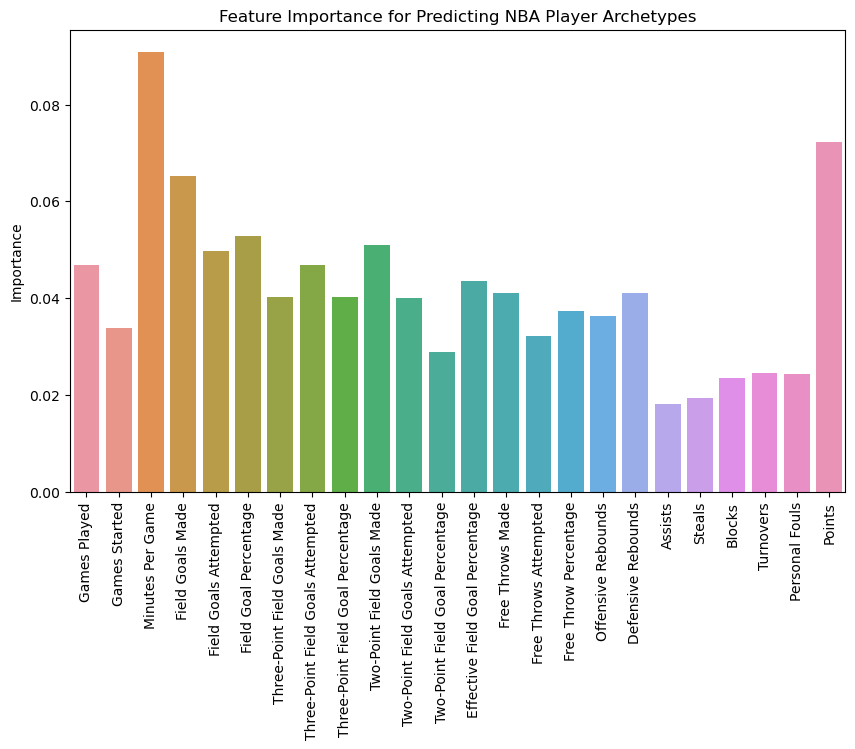

In [19]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.index, y=feature_importance['Importance'])
plt.xticks(rotation=90)
plt.title('Feature Importance for Predicting NBA Player Archetypes')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


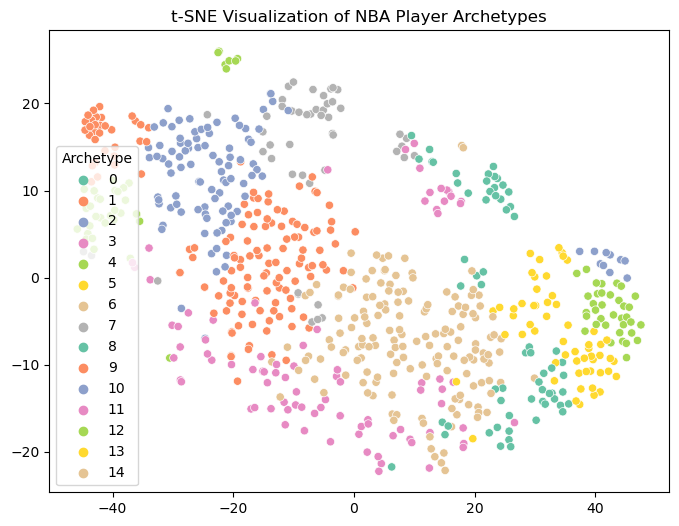

In [20]:
# Apply t-SNE for further dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(scaled_features)

# Scatter plot of the t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_components[:, 0], y=tsne_components[:, 1], hue=df['Archetype'], palette='Set2')
plt.title('t-SNE Visualization of NBA Player Archetypes')
plt.show()
